# GENERALISED ISING AND HEISENBERG MODEL NQS

## Import Requisite Libraries and Files

In [2]:
import numpy as np
import matplotlib as mp
%matplotlib inline
import pandas as pd
import IsingNQS as INQS
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## 1D Ising Model Code

In [ ]:
J = 4;
hx = 0.1;
hy = 0
hz = 0.0;
N = 3
alpha = 3
eps = 0.1#weight initializer
EpochNum = 100#
EpochSize = 1000#
NumBurn = 5#
Skip = 1#divisibility by skip
eta = 0.01#learning rate
reg = 0.#

IsingNQS, Energy, EnergyVariance = INQS.TrainIsingNQS(J,hx,hy,hz,N,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta,reg);

In [ ]:
N1=8;
eta1=0.01;
IsingNQS, Energy1, EnergyVariance1 = INQS.TrainIsingNQS(J,hx,hy,hz,N1,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta1,reg)
N2=12;
eta2=0.01;
IsingNQS, Energy2, EnergyVariance2 = INQS.TrainIsingNQS(J,hx,hy,hz,N2,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta2,reg)
N3=16;
eta3=0.01;
IsingNQS, Energy3, EnergyVariance3 = INQS.TrainIsingNQS(J,hx,hy,hz,N3,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta3,reg)
N4=20;
eta4=0.01
IsingNQS, Energy4, EnergyVariance4 = INQS.TrainIsingNQS(J,hx,hy,hz,N4,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta4,reg)

# Plotting code

In [ ]:
plt.figure(figsize=(10,8));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24};
mp.rc('font', **font)
plt.plot(Energy/N, label=N);
plt.plot(Energy1/N1, label=N1);
plt.plot(Energy2/N2, label=N2);
plt.plot(Energy3/N3, label=N3);
plt.plot(Energy4/N4, label=N4);
plt.xlabel('Iterations')
plt.title(r'1D Ising for different N, $\eta$=0.01')
plt.ylabel(r'$\frac{E_{local}}{N}$')
plt.grid(True)
plt.legend()
plt.savefig('1DISING_DifferentN.png')

In [ ]:
plt.figure(figsize=(10,8));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24};
mp.rc('font', **font);
plt.imshow(np.real(IsingNQS.W), cmap=cm.Greys)
#plt.savefig('weightsN20.png')

In [ ]:
plt.figure(figsize=(10,8));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24};
mp.rc('font', **font)
plt.plot(EnergyVariance, label=N);
plt.plot(EnergyVariance1, label=N1);
plt.plot(EnergyVariance2, label=N2);
plt.plot(EnergyVariance3, label=N3);
plt.plot(EnergyVariance4, label=N4);
plt.xlabel('Iterations')
plt.title(r'Var(Local Energy), $\eta$=0.01')
plt.ylabel(r'Var$(E_{local})$')
plt.grid(True)
plt.legend()
plt.savefig('1DIsingEnergyVariance.png')

## Wavefunction Plots

In [ ]:
from itertools import product

statvec= np.array(list(product([1,-1],repeat=N)));

In [ ]:
plt.figure(figsize=(12,3));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10};
mp.rc('font', **font)
rap=np.array([IsingNQS.Wavefunc(m)[0] for m in statvec]);
rap=rap/np.sum(rap);
plt.grid(True);
plt.plot(rap, label='');
plt.xticks(range(len(rap)), statvec);

## Demonstrating Phase transition Via Wavefunction plots

In [22]:
J = 5;
hx = 0.0;
hy = 0
hz = 1.0;
N = 4
alpha = 3
eps = 0.1#weight initializer
EpochNum = 100#
EpochSize = 1000#
NumBurn = 5#
Skip = 1#divisibility by skip
eta = 0.01#learning rate
reg = 0.#

IsingNQSf, Energy, EnergyVariance = INQS.TrainIsingNQS(J,hx,hy,hz,N,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta,reg);

J=-5;
IsingNQSa, Energy, EnergyVariance = INQS.TrainIsingNQS(J,hx,hy,hz,N,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta,reg);


C:\Users\Saad\Downloads\IsingNQS.py:523: ComplexWarning: Casting complex values to real discards the imaginary part
  SampleThetas[sample,:] = thetas


C:\Users\Saad\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Saad\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


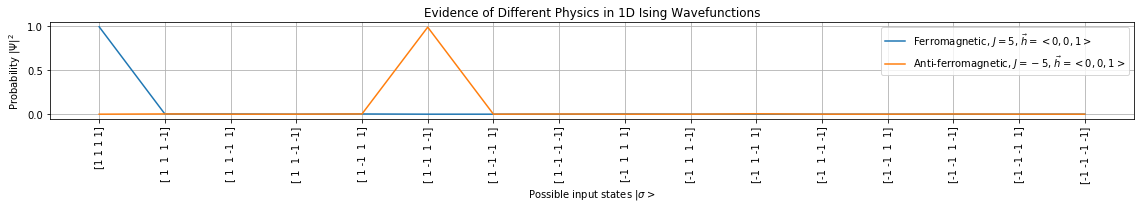

In [38]:
from itertools import product
statevec= np.array(list(product([1,-1],repeat=N)));

plt.figure(figsize=(16,3));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10};
mp.rc('font', **font)

data1=np.array([IsingNQSf.Wavefunc(m)[0] for m in statevec]);
data1=data1/np.sum(data1);
data2=np.array([IsingNQSa.Wavefunc(m)[0] for m in statevec]);
data2=data2/np.sum(data2);


plt.plot(data1, label=r'Ferromagnetic, $J=5$, $\vec{h}=<0,0,1>$');
plt.plot(data2, label=r'Anti-ferromagnetic, $J=-5$, $\vec{h}=<0,0,1>$');
plt.title('Evidence of Different Physics in 1D Ising Wavefunctions')
plt.grid(True);
plt.xticks(range(len(data1)), statevec, rotation='vertical');
plt.ylabel(r'Probability $|\Psi|^2$')
plt.xlabel(r'Possible input states $|\sigma>$')
plt.legend()
plt.tight_layout()
plt.savefig('FerroAntiFerro.png')

## Timing the 1D model

In [3]:
import time;
T=15;
time_list=np.zeros(T);

J = 4;
hx = 0.1;
hy = 0
hz = 0.0;
alpha = 3
eps = 0.1#weight initializer
EpochNum = 100#
EpochSize = 1000#
NumBurn = 5#
Skip = 1#divisibility by skip
eta = 0.01#learning rate
reg = 0.#

for i in range(0,T):
    start=time.time();
    N=i+3;
    for thru in range(5):
        INQS.TrainIsingNQS(J,hx,hy,hz,N,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta,reg);
    end=time.time();
    time_list[i]=(end-start)/5.0;


C:\Users\Saad\Downloads\IsingNQS.py:523: ComplexWarning: Casting complex values to real discards the imaginary part
  SampleThetas[sample,:] = thetas


Text(0.5,1,'Timing the 1D Ising NQS, 100 epochs of 1000 each')

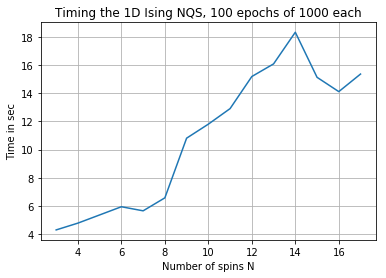

In [8]:
plt.figure(figsize=(6,4));
plt.plot(np.arange(3,T+3),time_list)
plt.grid(True)
plt.ylabel('Time in sec')
plt.xlabel('Number of spins N')
plt.title('Timing the 1D Ising NQS, 100 epochs of 1000 each')

## The 2D Ising model

In [ ]:
J = 3
hx = 1
hy = 0
hz = 1
Na = 3
Nb = 3
alpha = 3
eps = 0.1
EpochNum = 50
EpochSize = 1000
NumBurn = 5
Skip = 1
eta = 0.01
reg = 0

IsingNQS2D, Energy2D, EnergyVariance2D=INQS.Train2DIsingNQS(J,hx,hy,hz,Na,Nb,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta,reg)

# 3D Ising Model

In [ ]:
J = 3
hx = 1
hy = 0
hz = 1
Na = 4
Nb = 2
Nc = 2
alpha = 3
eps = 0.1
EpochNum = 50
EpochSize = 10000
NumBurn = 5
Skip = 1
eta = 0.01
reg = 0

IsingNQS3D, Energy3D, EnergyVariance3D = INQS.Train3DIsingNQS(J,hx,hy,hz,Na,Nb,Nc,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta,reg)

# 1D Heisenberg model

In [ ]:
Jx = 3
Jy = 3
Jz = 3
hx = 1
hy = 0
hz = 1
N = 8
alpha = 2
eps = 0.1
EpochNum = 100
EpochSize = 1000
NumBurn = 5
Skip = 1
eta = 0.1
reg = 0

HeisenbergNQS, HeisenbergEnergy, HeisenbergEnergyVariance = INQS.TrainHeisenbergNQS(Jx,Jy,Jz,hx,hy,hz,N,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta,reg)

# Further Plotting

## Higher dimensional Ising Models

In [ ]:
plt.figure(figsize=(10,8));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18};
mp.rc('font', **font)
#plt.plot(HeisenbergEnergy/N, label=r'Heisenberg, $\vec{J}=<3,3,3>$, $\vec{h}=<1,0,1>$');
plt.plot(Energy2D/9, label=r'2D $3\times3$, $J=3$, $\vec{h}=<1,0,1>$');
plt.plot(Energy3D/(4*2*2), label=r'3D $4\times 2 \times 2$, $J=3$, $\vec{h}=<1,0,1>$');
plt.xlabel('Iterations')
plt.title(r'Higher Dimensional Ising Spin Models, $\eta$=0.01')
plt.ylabel(r'$\frac{E_{local}}{N}$')
plt.grid(True)
plt.legend(loc=1)
plt.savefig('dIsing.png')

In [ ]:
plt.figure(figsize=(10,8));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24};
mp.rc('font', **font)
plt.plot(EnergyVariance2D, label=r'2D $3\times3$, $J=3$, $\vec{h}=<1,0,1>$');
plt.plot(EnergyVariance3D, label=r'3D $4\times 2 \times 2$, $J=3$, $\vec{h}=<1,0,1>$');
plt.xlabel('Iterations')
plt.title(r'Var(Local Energy) for Higher Dimensional Ising, $\eta$=0.01')
plt.ylabel(r'Var$(E_{local})$')
plt.grid(True)
plt.legend()
plt.savefig('HigherDIsingEnergyVariance.png')

## 1D Heisenberg Model

In [ ]:
plt.figure(figsize=(10,8));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18};
mp.rc('font', **font)
plt.plot(HeisenbergEnergy/N, label=r'$\vec{J}=<3,3,3>$, $\vec{h}=<1,0,1>$');
#plt.plot(Energy2D/9, label=r'Ising2D $3\times3$, $J=3$,$\vec{h}=<1,0,1>$');
#plt.plot(Energy3D/(4*2*2), label=r'Ising3D $4\times 2 \times 2$,$J=3$,$\vec{h}=<1,0,1>$ ');
plt.xlabel('Iterations')
plt.title(r'Heisenberg Spin Models Energy, $\eta$=0.1')
plt.ylabel(r'$\frac{E_{local}}{N}$')
plt.grid(True)
plt.legend(loc=1)
plt.savefig('Heisenberg.png')

In [ ]:
plt.figure(figsize=(10,8));
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24};
mp.rc('font', **font)
plt.plot(HeisenbergEnergyVariance,label=r'$\vec{J}=<3,3,3>$, $\vec{h}=<1,0,1>$')
plt.xlabel('Iterations')
plt.title(r'Var(Local Energy) for Heisenberg, $\eta$=0.1')
plt.ylabel(r'Var$(E_{local})$')
plt.grid(True)
plt.legend()
plt.savefig('HeisenbergEnergyVariance.png')

## Finding Other Energy Eigenstates

In [ ]:
J = 3
hx = 1
hy = 0
hz = 1
N = 8
alpha = 2
eps = 0.1
EpochNum = 30
EpochSize = 1000
NumBurn = 5
Skip = 1
eta = 0.1
reg = 0
lagrange = 0.0001

IsingHigherStateNQS, IsingGroundStateNQS, Energies, EnergyVariance, Overlaps = INQS.TrainIsingHigherEnergyNQS(J,hx,hy,hz,N,alpha,eps,EpochNum,EpochSize,NumBurn,Skip,eta,reg,lagrange)